In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3]:
rf.score(X_test, y_test)

0.8369309256761794

In [21]:
predictSample = X_test[[10, 20]]
print("Instance 0 - origin : %s, prediction : %s" % (str(y_test[10]), str(rf.predict(predictSample[0].reshape(1,-1))[0])))
print("Instance 1 - origin : %s, prediction : %s" % (str(y_test[20]), str(rf.predict(predictSample[1].reshape(1,-1))[0])))

Instance 0 - origin : 8.8, prediction : 8.272999999999996
Instance 1 - origin : 23.8, prediction : 23.748999999999977


### 모델 해석

In [24]:
from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(rf, predictSample)
for i in range(len(predictSample)):
    print("Instance : %d" % i)
    print("Bias (trainset mean) : %f" % bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 boston.feature_names), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print('prediction : %f ' % prediction[i])
    print('bias + sum of contribution : %f ' % (bias[i] + np.sum(contributions[i])))    
    print("-"*20) 

Instance : 0
Bias (trainset mean) : 22.720542
Feature contributions:
LSTAT -6.12
CRIM -4.64
RM -1.85
NOX -0.83
DIS -0.55
AGE -0.34
TAX -0.27
B 0.18
PTRATIO -0.02
RAD -0.0
ZN 0.0
INDUS 0.0
CHAS 0.0
prediction : 8.273000 
bias + sum of contribution : 8.273000 
--------------------
Instance : 1
Bias (trainset mean) : 22.720542
Feature contributions:
LSTAT 5.7
RM -4.08
AGE -0.27
TAX -0.16
CRIM 0.15
DIS -0.14
B -0.11
PTRATIO -0.07
INDUS -0.05
ZN 0.05
NOX 0.03
RAD -0.02
CHAS -0.0
prediction : 23.749000 
bias + sum of contribution : 23.749000 
--------------------


### dataset 간의 비교

In [5]:
X_test.shape

(152, 13)

In [25]:
ds1 = X_test.data[0:76]
ds2 = X_test.data[76:]

prediction1, bias1, contributions1 = ti.predict(rf, ds1)
prediction2, bias2, contributions2 = ti.predict(rf, ds2)

In [26]:
totalc1 = np.mean(contributions1, axis=0) 
totalc2 = np.mean(contributions2, axis=0) 

# bias 는 동일, prediction의 차이는 contribution의 차이
print(np.sum(bias1) - np.sum(bias2))
print(np.sum(totalc1 - totalc2))
print(np.mean(prediction1) - np.mean(prediction2))

0.0
-0.4914736842105273
-0.49147368421052917


In [27]:
for c, feature in sorted(zip(totalc1 - totalc2, 
                             boston.feature_names), reverse=True):
    print(feature, round(c, 2))

DIS 0.32
LSTAT 0.24
NOX 0.11
RAD 0.05
AGE 0.02
ZN 0.0
CRIM 0.0
TAX -0.0
CHAS -0.0
INDUS -0.03
PTRATIO -0.05
B -0.07
RM -1.09


### classification

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
 
rf = RandomForestClassifier(max_depth = 4, n_estimators=100)
rf.fit(iris.data, iris.target)

instance = iris.data[100:101]
prediction, bias, contributions = ti.predict(rf, instance)
print("Prediction ", prediction)
print("Bias (trainset prior) ", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], iris.feature_names):
    print(feature, c)

Prediction  [[0.         0.00489952 0.99510048]]
Bias (trainset prior)  [[0.34173333 0.33186667 0.3264    ]]
Feature contributions:
sepal length (cm) [-0.03720165 -0.00507233  0.04227398]
sepal width (cm) [ 0.          0.00243217 -0.00243217]
petal length (cm) [-0.18791449 -0.13505514  0.32296964]
petal width (cm) [-0.11661719 -0.18927184  0.30588903]


Feature ranking:
1. feature 2 (0.514424)
2. feature 3 (0.398243)
3. feature 0 (0.069499)
4. feature 1 (0.017834)


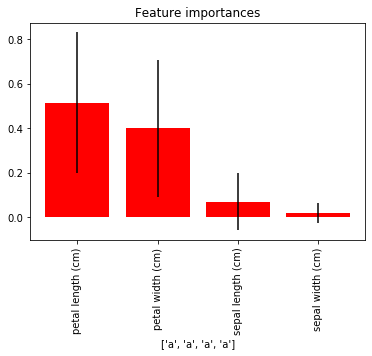

In [39]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(iris.data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(iris.data.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
ticklabel = [iris.feature_names[x] for x in indices]
plt.xticks(range(iris.data.shape[1]), ticklabel, rotation='vertical')
plt.xlabel(['a', 'a', 'a', 'a'])
plt.show()

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
indices

array([2, 3, 0, 1], dtype=int64)